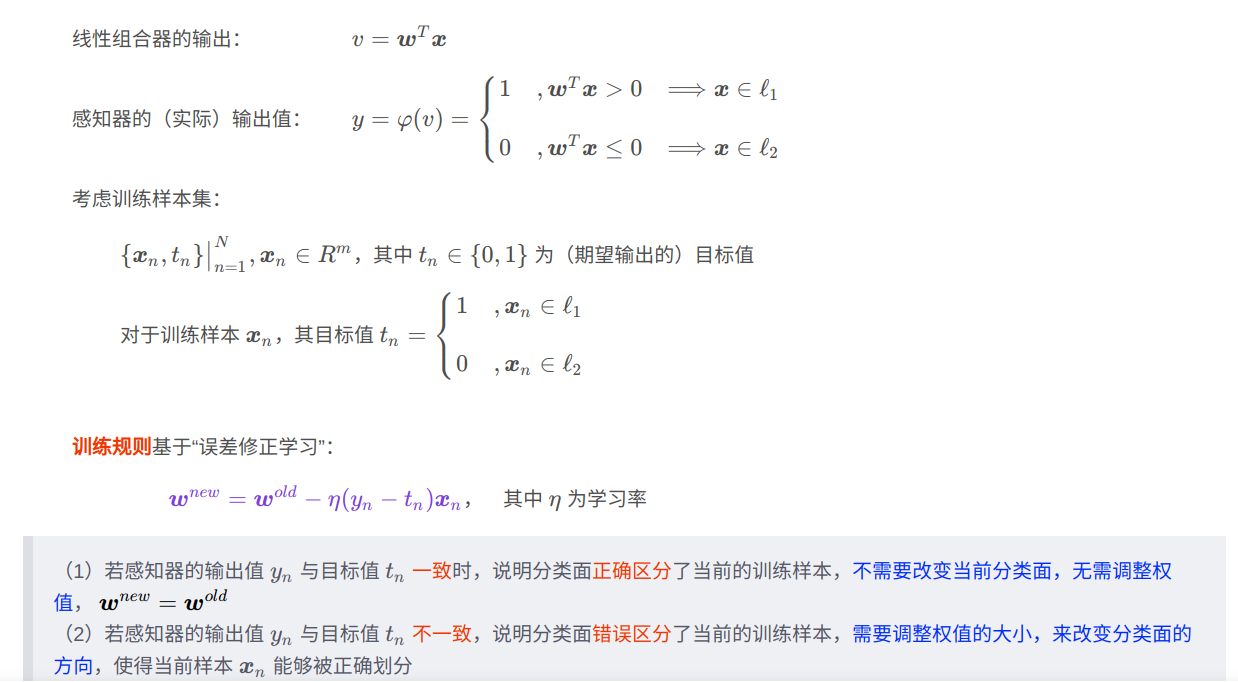

https://blog.csdn.net/xfijun/article/details/105688793

## 如果我们把所有分错的点和直线的距离求和，让这段求和的举例最小（最好是0，这样就表示没有分错的点了），这条直线就是我们要找的。

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv,qr
from sklearn.datasets import load_iris
%matplotlib inline

In [2]:
#load data
iris = load_iris()


In [6]:
print(type(iris))
print(type(iris.data))
print(type(iris.target))

<class 'sklearn.utils.Bunch'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [7]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['label'] = iris.target  #iris.target为目标值

In [9]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [10]:
df.count()

sepal length (cm)    150
sepal width (cm)     150
petal length (cm)    150
petal width (cm)     150
label                150
dtype: int64

In [11]:
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [12]:
iris_data=pd.read_csv('iris.csv')
df2 = pd.DataFrame(iris_data)

In [13]:
df2

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,virginica
146,147,6.3,2.5,5.0,1.9,virginica
147,148,6.5,3.0,5.2,2.0,virginica
148,149,6.2,3.4,5.4,2.3,virginica


In [14]:
df.columns = ['sepal length','sepal width','petal length','petal width','label']#花萼长度，花萼宽度，花瓣长度，花瓣宽度等4个用于识别鸢尾花的属性
df.label.value_counts() #目标值label的统计
#value_counts()方法统计数组或序列所有元素出现次数，对某一列统计可以直接用df.column_name.value_counts()

0    50
1    50
2    50
Name: label, dtype: int64

In [47]:
df

,sepal length,sepal width,petal length,petal width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [15]:
df.shape

(150, 5)

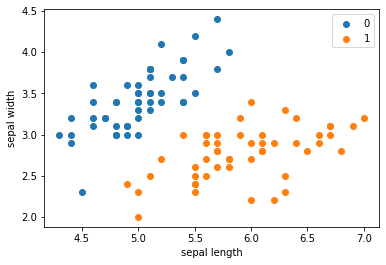

In [16]:
plt.scatter(df[:50]['sepal length'],df[:50]['sepal width'],label = '0')  #label = '0'图右上角的标记
plt.scatter(df[50:100]['sepal length'],df[50:100]['sepal width'],label = '1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()         #给图加上图例

In [17]:
#本数据集共拥有三个种类，选出两个种类
data = np.array(df.iloc[:100,[0,1,-1]]) #注意不是冒号，[0,1,-1]是列排序，即分别选择第 0，1和最后一列，

In [18]:
data.ndim

2

In [19]:
data.shape

(100, 3)

In [20]:
len(data[0])#即有三列

3

In [21]:
len(data)

100

In [22]:
X,y = data[:,:-1],data[:,-1]#即前两列赋值给X ,最后一列赋值给y

In [23]:
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [24]:
y = np.array([1 if i==1 else -1 for i in y])#将label改成1和-1

In [25]:
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [36]:
np.ones(2)

array([1., 1.])

In [27]:
data.shape

(100, 3)

## Perceptron

In [28]:
class Model:
    def __init__(self): #注意def后面有空格
        self.w = np.ones(len(data[0])-1,dtype = np.float32)#属性只有两个 所以w的维度为2 w的属性是array
        self.b = 0
        self.l_rate = 0.1
        
    def sign(self,x,w,b):
        y = np.dot(x,w)+b
        return y
    
    #随机梯度下降法
    def fit(self,X_train,y_train):
        #误分类点
        is_wrong = False
        while not is_wrong:
            wrong_count = 0
            for d in range(len(X_train)):
                #获取第 d 个样本
                X = X_train[d]
                y = y_train[d]
                #获取第 d 个样本特征
                if y * self.sign(X,self.w,self.b) <= 0: ##注意= 0也是误分类
                    self.w = self.w + self.l_rate * np.dot(y,X)#更新w
                    self.b = self.b + self.l_rate * y          #更新 b
                    wrong_count+=1
            if wrong_count==0:            #注意这里的缩进
                is_wrong = True
        return 'Perceptron Model Yes!'  
    def score(self):
        pass

In [29]:
perceptron = Model()
perceptron.fit(X,y)

'Perceptron Model Yes!'

In [30]:
len(perceptron.w)

2

In [31]:
#划分为 十等份
np.linspace(4,7,10)

array([4.        , 4.33333333, 4.66666667, 5.        , 5.33333333,
       5.66666667, 6.        , 6.33333333, 6.66666667, 7.        ])

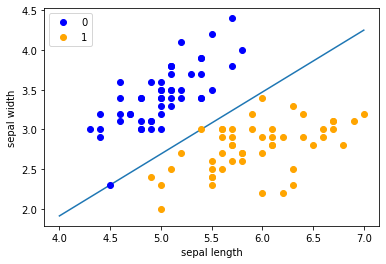

In [32]:
x_points = np.linspace(4,7,10)  # 4-7  十等分
# 分类点到超平面的距离
y_ = -(perceptron.w[0]*x_points + perceptron.b) / perceptron.w[1]  #因为w*x+b=0公式展开，P36手写
plt.plot(x_points,y_)

plt.plot(data[:50,0],data[:50,1],'bo',color = 'blue',label = '0')
plt.plot(data[50:100,0],data[50:100,1],'bo',color = 'orange',label = '1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

## sklearn 实例

In [33]:
import sklearn
from sklearn.linear_model import Perceptron

In [34]:
sklearn.__version__

'0.24.2'

In [35]:
clf = Perceptron(fit_intercept=True,#是否计算偏置
                max_iter = 1000,
                shuffle = True)
clf.fit(X,y)

Perceptron()

In [36]:
# Weights assigned to the features.
print(clf.coef_)

[[ 23.2 -38.7]]


In [37]:
# 截距 Constants in decision function.
print(clf.intercept_)

[-5.]


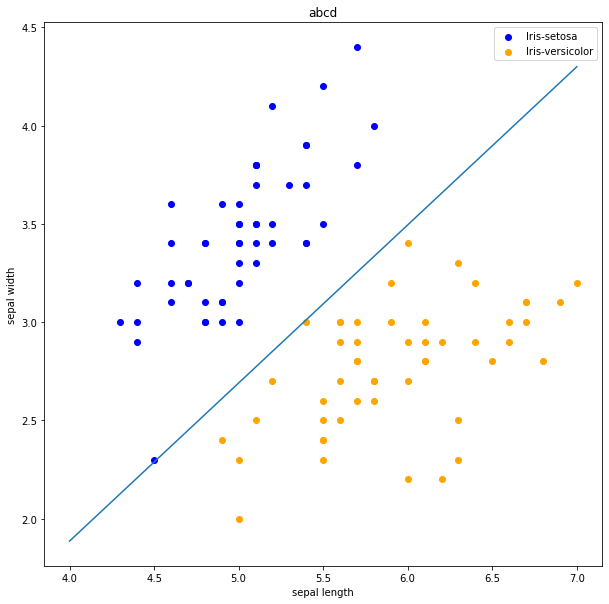

In [44]:
# 画布大小
plt.figure(figsize=(10,10))

# 中文标题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.title('abcd')#鸢尾花线性数据示例

plt.scatter(data[:50, 0], data[:50, 1], c='b', label='Iris-setosa',)
plt.scatter(data[50:100, 0], data[50:100, 1], c='orange', label='Iris-versicolor')

# 画感知机的线
x_ponits = np.arange(4, 8)
y_ = -(clf.coef_[0][0]*x_ponits + clf.intercept_)/clf.coef_[0][1]
plt.plot(x_ponits, y_)

# 其他部分
plt.legend()  # 显示图例
plt.grid(False)  # 不显示网格
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

## 注意 !

在上图中，有一个位于左下角的蓝点没有被正确分类，这是因为 SKlearn 的 Perceptron 实例中有一个tol参数。

tol 参数规定了如果本次迭代的损失和上次迭代的损失之差小于一个特定值时，停止迭代。所以我们需要设置 tol=None 使之可以继续迭代：

In [42]:
#coding:utf-8
#import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
#有中文出现的情况，需要u'内容'

plt.rcParams['font.sans-serif']=['SimHei'] #显示中文标签
plt.rcParams['axes.unicode_minus']=False

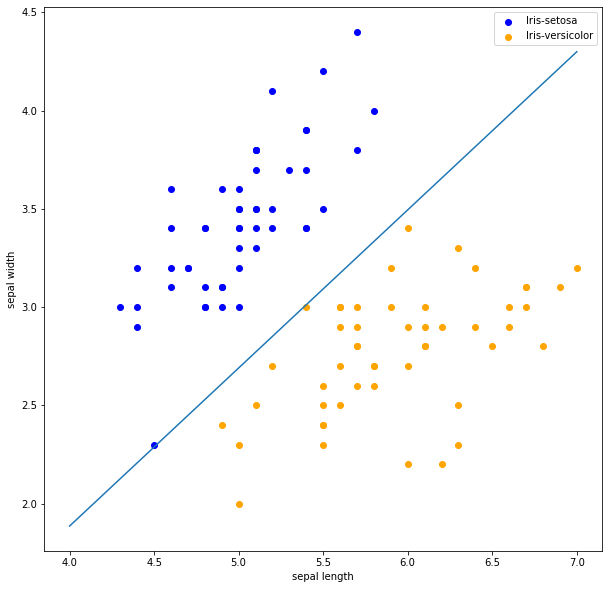

In [46]:
clf = Perceptron(fit_intercept=True, 
                 max_iter=1000,
                 tol=None,
                 shuffle=True)
clf.fit(X, y)

# 画布大小
plt.figure(figsize=(10,10))

# 中文标题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
#plt.title('u鸢尾花线性数据示例')

plt.scatter(data[:50, 0], data[:50, 1], c='b', label='Iris-setosa',)
plt.scatter(data[50:100, 0], data[50:100, 1], c='orange', label='Iris-versicolor')

# 画感知机的线
x_ponits = np.arange(4, 8)
y_ = -(clf.coef_[0][0]*x_ponits + clf.intercept_)/clf.coef_[0][1]
plt.plot(x_ponits, y_)

# 其他部分
plt.legend()  # 显示图例
plt.grid(False)  # 不显示网格
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

现在可以看到，所有的两种鸢尾花都被正确分类了。

* p44-补充一下，对偶形式一个好处就是当更新完成之后，根据每个 α 的值，可以知道每个样本让参数更新了几次